# **Support Vector Machine Classification Sklearn Example**

Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### **Data Pre-processing**

Load dataset (Kaggle link [here](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)).

In [2]:
dataset = pd.read_csv("/content/cancer_data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Target diagnosis Label Encoding - 1 for Malignant and 2 for Bengin

In [4]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, "B":2})
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Copying values of diagnosis to newly created labels column

In [5]:
labels = dataset['diagnosis'].tolist()
dataset['Class'] = labels
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Class
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


Drop unncessary columns

In [6]:
dataset = dataset.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### **Data Visualization**

Split data into two class

In [7]:
M_data = dataset[dataset.Class ==1]
B_data = dataset[dataset['Class'] == 2]

In [8]:
print(M_data.shape)
print(B_data.shape)

(212, 31)
(357, 31)


Select two features and generate a scatter plot based on these two features. Use different colors to differentiate data points for different classes.

Text(0, 0.5, 'texture_mean')

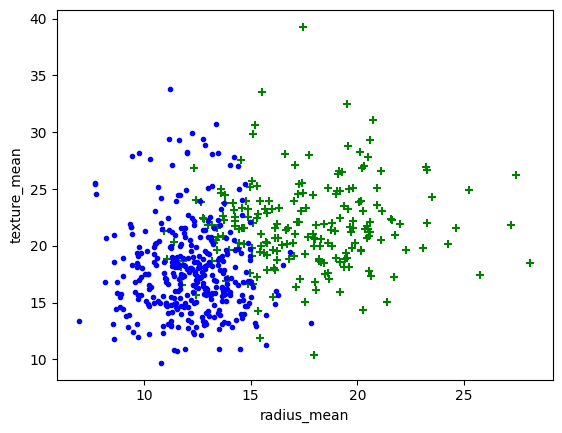

In [9]:
plt.scatter(M_data['radius_mean'], M_data['texture_mean'], color='green', marker="+")
plt.scatter(B_data['radius_mean'], B_data['texture_mean'], color='blue', marker='.')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

### **Split data into training and test set**

In [10]:
X = dataset.drop('Class', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
Y = dataset.Class
Y.shape

(569,)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


### **Build model**

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(kernel='linear')

### **Train the model**

In [15]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

### **Test and evaluate the model**

Predict on test set

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array([1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2])

In [18]:
Y_test = np.array(Y_test)

Calculate the socre

In [19]:
precentage = model.score(X_test, Y_test)
precentage

0.956140350877193

Calculate other evaluation metrics: Accuracy, F1-Score, Confusion Matrix

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
Y_true = Y_test
Y_pred = predictions

In [22]:
accuracy_score(Y_true, Y_pred)

0.956140350877193

In [23]:
f1_score(Y_true, Y_pred)

0.945054945054945

In [24]:
confusion_matrix(Y_true, Y_pred)

array([[43,  3],
       [ 2, 66]])

In [25]:
tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()

In [26]:
print(tn, fp, fn, tp)

43 3 2 66


#### What is Precision-Recall, F1 score, Confusion Matrix(CM) and Accuracy?

To answer these questions, we should to know **true positive, false positive, false negative** and **ture nagative** firstly.

For classification problems, the combination of the result predicted by the model and the true category of the sample can be divided into **true positive(TP), false positive(FP), false negative(FN)** and **ture nagative(TN)**. Details can be seen below:

P/N is the positive or negative of the prediction result, and T/F is the judgment of whether the prediction result is correct or not. In other words:

    TP is judged to be a positive example (P), and the judgment is correct (T) (that is, the actual is a positive example);
    TN is judged as a negative case (N), and the judgment is correct (T) (that is, it is actually a negative case);
    FP is judged as a positive case (N), and the judgment is wrong (T) (that is, it is actually a negative case);
    FN is judged as a negative case (N), and the judgment is wrong (T) (that is, it is actually a positive case);
    
Based on these concepts, some other concepts have been produced:

**Precision:** = ${TP} \over {TP + FP}$   Proportion of the samples that the model judges to be positive

**Recall** = ${TP} \over {TP + FN}$    Indicates how many positive cases I judged in all positive cases

If you consider precision and recall, you can see that they are inversely correlated to some extent, because if the number of false positives (FP) increases, the number of false nagetive (FN) will often decrease, and vice versa. They can be combined to give a single metric - F1 sorce:

**F1-Sorce** = ${2 \times Precision \times Recall} \over {Precision + Recall}$

**Accuracy** = ${TP + TN} \over {TP + TN + FN + FP}$

For classification problems, we can use **Confusion Matrix(CM)** to determine whether the result is good. That is, the predicted results of all categories and the real results are placed in the same table by category. In this table, we can clearly see the number of correct identifications and the number of incorrect identifications for each category. See details in below table:

Confusion matrix can be used to judge multi-classification problems. Taking two classification as an example is:

|         |Actual 0|Actual 1|
|---------|--------|--------|
|Perdict 0|TN      |FN      |
|Perdict 1|FP      |TP      |